In [1]:
# Elaborar un modelo predictivo aplicando técnicas de Agrupamiento
# Jerárquico utilizando lenguaje Python para resolver un problema de
# clusterización


In [2]:
# Para esta sección, siga los pasos para crear la clasificación:

# Para un grupo de datos simulados, use la siguiente función:

import pandas as pd
from sklearn import datasets
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1a. Obtenga un resumen estadístico de los datos

iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


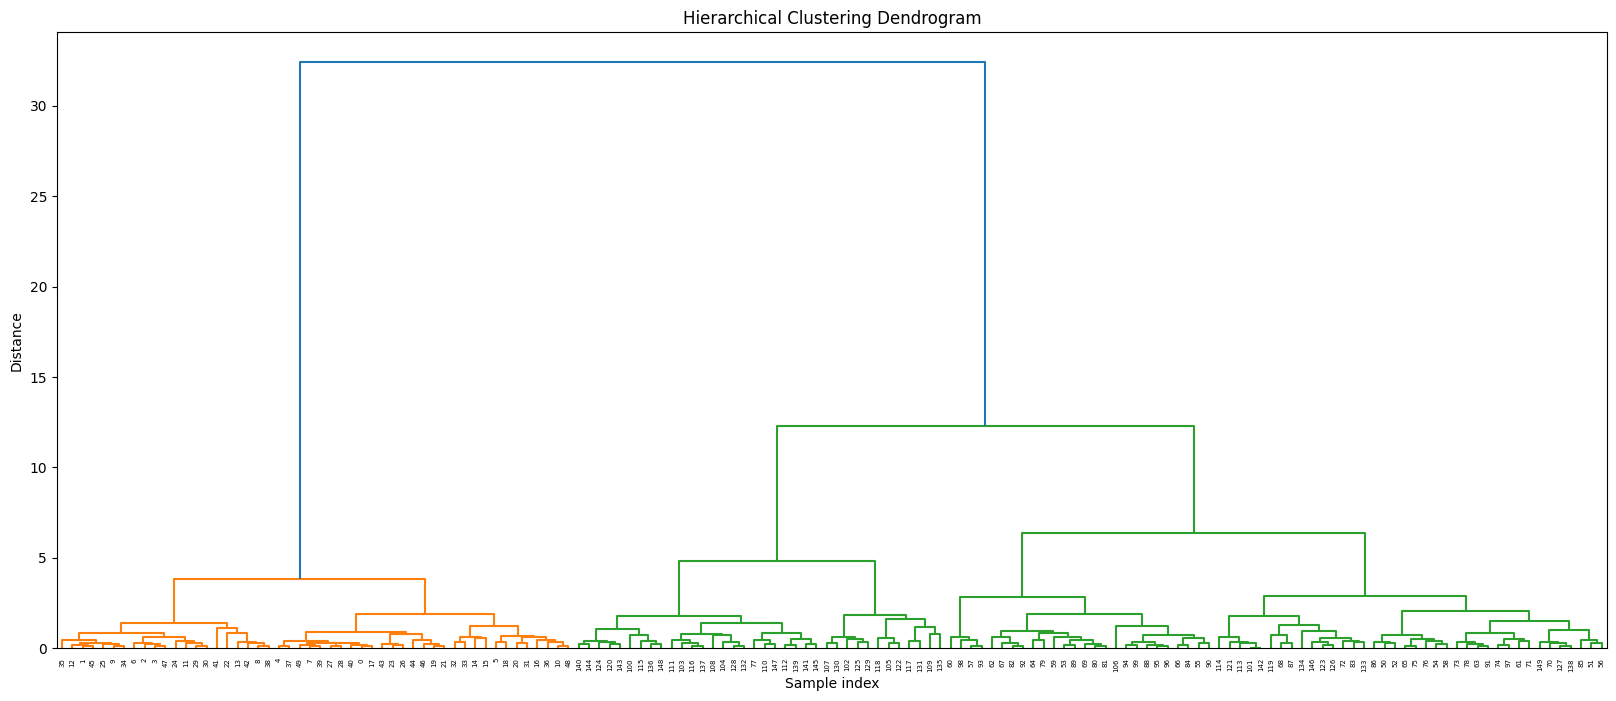

In [3]:

from sklearn.cluster import linkage_tree


X = iris_df.drop(['target'], axis=1)

# generate the linkage matrix
Z = linkage(X, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

Text(0.5, 1.0, 'Agglomerative Clustering with 5 clusters')

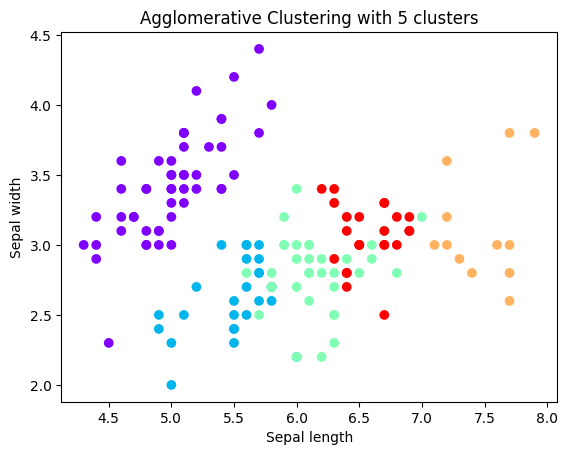

In [4]:
# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)
labels = clustering.labels_

# Plot the clustering
fig, ax = plt.subplots()

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Agglomerative Clustering with {} clusters'.format(n_clusters))


Se observa que el k adecuado es 3


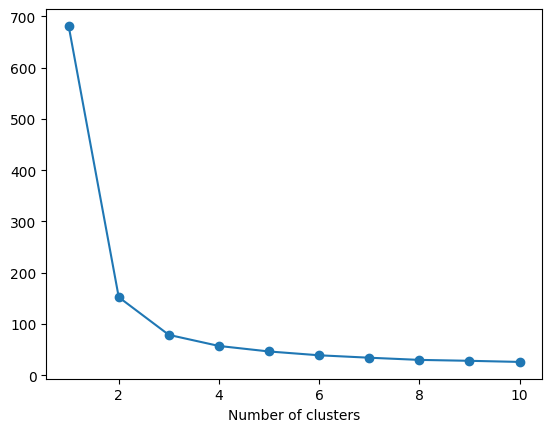

In [5]:
# Establezca el k adecuado para estos datos.
# utilice el método del codo para determinar el k adecuado
# para el conjunto de datos de iris.

# watning
import warnings
warnings.filterwarnings('ignore')

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')

print("Se observa que el k adecuado es 3")

Text(0.5, 0, 'Number of clusters')

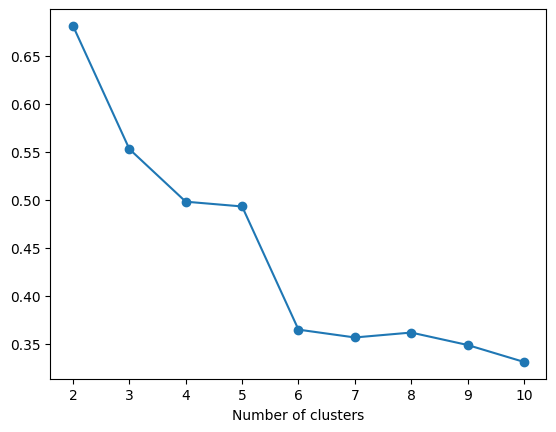

In [6]:
# Tome la decisión por medio de “índices silhouette”
# para determinar el k adecuado para el conjunto de datos de iris.

silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))

# plot
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')


In [7]:
# Dendrogramas
# R: El dendrograma es una representación gráfica de los resultados del
# agrupamiento jerárquico. Permite ver a simple vista la similitud entre
# los individuos y la forma en que se agrupan. En el eje vertical se
# representa la distancia entre los individuos o grupos de individuos
# que se van uniendo. En el eje horizontal se representan los individuos
# o grupos de individuos que se van uniendo.

# Cluster
# R: Un cluster es un grupo de objetos que son similares entre sí y son
# disimilares a los objetos pertenecientes a otros grupos. Los objetos
# dentro de un cluster son similares (o relacionados) entre sí y son
# disimilares (o no relacionados) a los objetos pertenecientes a otros
# clusters.

# Agrupación jerárquica
# R: La agrupación jerárquica es un método de agrupamiento que busca
# construir una jerarquía de clusters. Los algoritmos de agrupación
# jerárquica se pueden agrupar en dos tipos: agrupación jerárquica
# aglomerativa y agrupación jerárquica divisiva. La agrupación
# jerárquica aglomerativa es un enfoque ascendente: cada observación
# comienza en su propio cluster, y los clusters se van uniendo a medida
# que se mueve hacia arriba en la jerarquía. La agrupación jerárquica
# divisiva es un enfoque descendente: todas las observaciones comienzan
# en un cluster, y los clusters se dividen a medida que se mueve hacia
# abajo en la jerarquía.


